# Praca domowa 3 - MIOWAD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NeuralNetwork.NeuralNetwork import Net, mse
from NeuralNetwork.Layers import DenseNetLayer
from NeuralNetwork.ActivationFunctions import SigmoidFunction, LinearFunction
from NeuralNetwork.Initializers import RandomNormalInitializer
from NeuralNetwork.Optimizers import SGD_Momentum, SGD_RMSProp, SGD

## Zbiór square - large

In [3]:
df = pd.read_csv("./data/regression/square-large-training.csv", index_col=0)
df.head()

,x,y
1,-1.263271,13.626856
2,0.465033,-110.537001
3,-1.252473,11.182059
4,-0.760128,-77.998459
5,0.423671,-113.845225


In [4]:
X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

In [5]:
df1 = pd.read_csv("./data/regression/square-large-test.csv", index_col=0)
df1.head()

,x,y
1,1.366456,38.048149
2,-0.390025,-116.309280
3,1.090418,-22.988883
4,1.805831,163.492435
5,-0.938124,-50.793090


In [6]:
X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

Trenowanie sieci z algorytmem SGD

In [7]:
np.random.seed(0)
n = Net(optimizer = SGD(learning_rate=0.00001))
n.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n.train(X, Y, X1, Y1, n_epochs=500, eval_frequency=50)

Epoch: 0, mse train: 9542.744703430897, mse eval: 10651.261208093529
Epoch: 50, mse train: 1703.7953064086955, mse eval: 3375.9709492354164
Epoch: 100, mse train: 277.19214914288443, mse eval: 1264.9744103797354
Epoch: 150, mse train: 108.40497204122806, mse eval: 928.3721397077384
Epoch: 200, mse train: 59.526121076201925, mse eval: 717.1217454247477
Epoch: 250, mse train: 36.74032167345811, mse eval: 573.6293432202423
Epoch: 300, mse train: 24.10671892615205, mse eval: 467.1146693704551
Epoch: 350, mse train: 16.542245748108677, mse eval: 388.33775536013593
Epoch: 400, mse train: 11.859740657440948, mse eval: 331.635944288532
Epoch: 450, mse train: 8.945337639952202, mse eval: 291.6793331977462
Training result:
    mse train: 7.14736102753325
    mse eval: 264.2766713211414


Trenowanie sieci z algorytmem SGD z momentem

In [9]:
np.random.seed(0)
n1 = Net(optimizer = SGD_Momentum(learning_rate=0.00001, momentum=0.8))
n1.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n1.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n1.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n1.train(X, Y, X1, Y1, n_epochs=500, eval_frequency=50)

Epoch: 0, mse train: 9306.674896978599, mse eval: 10528.735898264022
Epoch: 50, mse train: 36.24874265262894, mse eval: 572.567438580964
Epoch: 100, mse train: 7.458276338595715, mse eval: 269.6023909650793
Epoch: 150, mse train: 4.0127557357378585, mse eval: 205.18253012186392
Epoch: 200, mse train: 2.930268586234175, mse eval: 191.94183955573192
Epoch: 250, mse train: 2.3462840603813797, mse eval: 190.18766433358584
Epoch: 300, mse train: 1.9708313689000387, mse eval: 191.09051675566872
Epoch: 350, mse train: 1.7051567181548575, mse eval: 192.19618128199647
Epoch: 400, mse train: 1.5053097544251066, mse eval: 192.87491474711686
Epoch: 450, mse train: 1.3485969450702537, mse eval: 193.05249213392594
Training result:
    mse train: 1.2242995557471203
    mse eval: 192.80958890037493


In [12]:
n1.train(X, Y, X1, Y1, n_epochs=200, eval_frequency=50)

Epoch: 0, mse train: 1.2220050684044652, mse eval: 192.80096485762476
Epoch: 50, mse train: 1.1174403348109163, mse eval: 192.21308980073437
Epoch: 100, mse train: 1.0295432053824694, mse eval: 191.3698004018311
Epoch: 150, mse train: 0.9545917893483774, mse eval: 190.33546758231665
Training result:
    mse train: 0.8911127855302556
    mse eval: 189.18469675149387


Wizualizacja predykcji na zbiorze treningowym

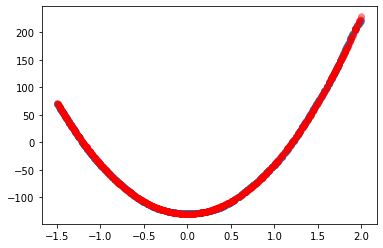

In [14]:
plt.scatter(X, n1.forward(X), alpha = 0.5)
plt.scatter(X, Y, color='red', alpha = 0.25)
plt.show()

Wizualizacja predykcji na zbiorze testowym

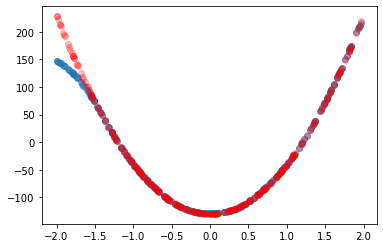

In [13]:
plt.scatter(X1, n1.forward(X1), alpha = 0.5)
plt.scatter(X1, Y1, color='red', alpha = 0.25)
plt.show()

Jak widać na powyższych wykresach, sieć nauczyła się bardzo dobrze na zbiorze treningowym, osiągając na nim MSE poniżej $1$. 

Wynik na zbiorze testowym okazał się gorszy - około $190$.

Widać również, że sieć trenowana na algorytmie z momentem (takie same wartości learning rate dla trenowania z momentem i bez) osiągała lepsze wyniki w tej samej liczbie epok - zwykły SGD uzyskał po 500 epokach wynik $7.15$ na zbiorze treningowym, podczas gdy SGD z momentem $1.22$.

Trenowanie sieci z algorytmem SGD z RMSProp

In [8]:
np.random.seed(0)
n1_1 = Net(optimizer = SGD_RMSProp(learning_rate=0.0001, beta=0.9))
n1_1.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n1_1.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n1_1.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n1_1.train(X, Y, X1, Y1, n_epochs=500, eval_frequency=50)

Epoch: 0, mse train: 9573.341321165726, mse eval: 10664.947806919101
Epoch: 50, mse train: 8769.126088922596, mse eval: 9992.121379403043
Epoch: 100, mse train: 8063.709083252913, mse eval: 9319.392496354269
Epoch: 150, mse train: 6654.586670945258, mse eval: 8023.4048556949165
Epoch: 200, mse train: 5539.818865961488, mse eval: 6758.501874765363
Epoch: 250, mse train: 3868.4400940473834, mse eval: 5141.4751658840905
Epoch: 300, mse train: 2945.2950225105474, mse eval: 4293.133809858735
Epoch: 350, mse train: 2202.5194679927336, mse eval: 3667.8732136647063
Epoch: 400, mse train: 1596.8594805043163, mse eval: 3129.4071575205166
Epoch: 450, mse train: 1090.1031719840225, mse eval: 2616.2028609431195
Training result:
    mse train: 690.6118686383055
    mse eval: 2049.056938777953


In [9]:
n1_1.train(X, Y, X1, Y1, n_epochs=500, eval_frequency=50)

Epoch: 0, mse train: 683.5468771173723, mse eval: 2054.2141464941387
Epoch: 50, mse train: 395.8414980173985, mse eval: 1620.4018742064584
Epoch: 100, mse train: 218.37372525043367, mse eval: 1325.250582085566
Epoch: 150, mse train: 114.29438026364124, mse eval: 1058.1464267950012
Epoch: 200, mse train: 67.05333575873198, mse eval: 548.5180006509535
Epoch: 250, mse train: 42.08037883758955, mse eval: 492.7474931548667
Epoch: 300, mse train: 21.539970261388138, mse eval: 913.9331812534288
Epoch: 350, mse train: 5.634739200389917, mse eval: 776.8085453052616
Epoch: 400, mse train: 7.316608120265116, mse eval: 775.3558709167585
Epoch: 450, mse train: 5.58139987775122, mse eval: 771.9122811992992
Training result:
    mse train: 4.714677172831969
    mse eval: 658.9481700706482


Wizualizacja predykcji na zbiorze testowym

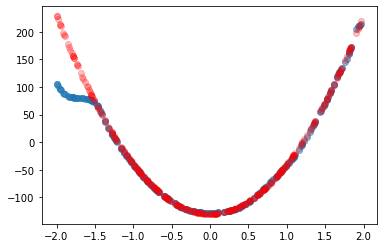

In [10]:
plt.scatter(X1, n1_1.forward(X1), alpha = 0.5)
plt.scatter(X1, Y1, color='red', alpha = 0.25)
plt.show()

Jak widać powyżej, trenowanie z RMSProp wcale nie przyspiesza procesu uczenia. 

Z learning rate o wartości takiej, jak poprzednie dwie sieci ($0.00001$), algorytm nie zbiegał. 

Z learning rate większym o rząd wielkości ($0.0001$) algorytm zbiega, ale znacznie wolniej w porównaniu z dwoma poprzednimi algorytmami.

Algorytm SGD "bez dodatków" po 500 epokach miał wyniki: 

    mse train: 7.15
    
    mse test: 264.28

Natomiast SGD z RMSProp po 500 epokach: 

    mse train: 690.612
    
    mse eval: 2049.06

## Zbiór steps - large

In [3]:
df = pd.read_csv("./data/regression/steps-large-training.csv", index_col=0)
X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

df1 = pd.read_csv("./data/regression/steps-large-test.csv", index_col=0)
X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

Trenowanie sieci z algorytmem SGD z momentem

In [21]:
np.random.seed(0)
n3 = Net(optimizer = SGD_Momentum(learning_rate=0.00001, momentum=0.8))
n3.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n3.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n3.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n3.train(X, Y, X1, Y1, n_epochs=500, eval_frequency=50)

Epoch: 0, mse train: 695.0466720952493, mse eval: 707.5043384582335
Epoch: 50, mse train: 46.497758603422845, mse eval: 44.598667768597906
Epoch: 100, mse train: 35.04075386685931, mse eval: 29.672468918617124
Epoch: 150, mse train: 30.49431469737647, mse eval: 24.56362152624623
Epoch: 200, mse train: 27.61472940802823, mse eval: 20.88218255354116
Epoch: 250, mse train: 25.65609595076043, mse eval: 17.959601949393562
Epoch: 300, mse train: 24.192228543467873, mse eval: 15.604470707306252
Epoch: 350, mse train: 22.996652457650832, mse eval: 13.878983159569053
Epoch: 400, mse train: 21.723042524625296, mse eval: 12.637344285377054
Epoch: 450, mse train: 20.092039900713566, mse eval: 11.611850838414426
Training result:
    mse train: 18.21398039972285
    mse eval: 10.723193914464542


In [24]:
n3.train(X, Y, X1, Y1, n_epochs=400, eval_frequency=50)

Epoch: 0, mse train: 18.174750738407543, mse eval: 10.706518925747016
Epoch: 50, mse train: 16.316664233361667, mse eval: 9.975764660462946
Epoch: 100, mse train: 14.819113326564647, mse eval: 9.438132763967642
Epoch: 150, mse train: 13.68003969473457, mse eval: 9.045572122489931
Epoch: 200, mse train: 12.861771179965618, mse eval: 8.783222738536272
Epoch: 250, mse train: 12.32834320547918, mse eval: 8.64876181029556
Epoch: 300, mse train: 12.004283122441219, mse eval: 8.616091442573072
Epoch: 350, mse train: 11.805680658576229, mse eval: 8.640213213152197
Training result:
    mse train: 11.685654707864627
    mse eval: 8.686726654684598


In [34]:
n3.train(X, Y, X1, Y1, n_epochs=400, eval_frequency=50)

Epoch: 0, mse train: 11.52348687967906, mse eval: 8.790425459010054
Epoch: 50, mse train: 11.50021948037734, mse eval: 8.782336389238644
Epoch: 100, mse train: 11.478085948098128, mse eval: 8.746201925525423
Epoch: 150, mse train: 11.459180180023468, mse eval: 8.687873319962183
Epoch: 200, mse train: 11.446692971178784, mse eval: 8.614474074638414
Epoch: 250, mse train: 11.442461716834185, mse eval: 8.535464487905697
Epoch: 300, mse train: 11.449581532306507, mse eval: 8.459329268139863
Epoch: 350, mse train: 11.472893739846828, mse eval: 8.393582821620077
Training result:
    mse train: 11.508599530138037
    mse eval: 8.341019096440029


Dalszy trening doprowadził do **pogorszenia wyników sieci**:

In [27]:
n3.train(X, Y, X1, Y1, n_epochs=1000, eval_frequency=50)

Epoch: 0, mse train: 11.683755414657236, mse eval: 8.687753276589895
Epoch: 50, mse train: 11.608675200426278, mse eval: 8.737372653895925
Epoch: 100, mse train: 11.560779723566522, mse eval: 8.77533595901979
Epoch: 150, mse train: 11.52780964609799, mse eval: 8.792553599752264


KeyboardInterrupt: 

Niestety, podczas treningu błąd zaczął rosnąć na zbiorze testowym, **dlatego trening został zatrzymany**.

MSE na zbiorze testowym osiągnęło najmniejszą wartość $8.34$.

Wizualizacja predykcji na zbiorze treningowym

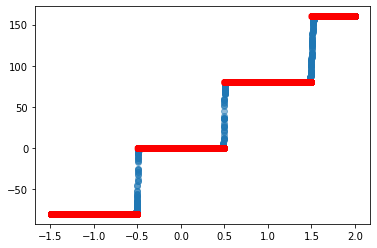

In [35]:
plt.scatter(X, n3.forward(X), alpha = 0.5)
plt.scatter(X, Y, color='red', alpha = 0.25)
plt.show()

Wizualizacja predykcji na zbiorze testowym

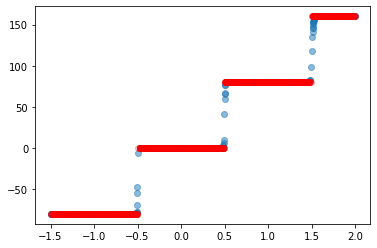

In [36]:
plt.scatter(X1, n3.forward(X1), alpha = 0.5)
plt.scatter(X1, Y1, color='red', alpha = 0.25)
plt.show()

## Zbiór multimodal-large

In [37]:
df = pd.read_csv("./data/regression/multimodal-large-training.csv")
df.head()
X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

df1 = pd.read_csv("./data/regression/multimodal-large-test.csv")
df1.head()
X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

In [40]:
from NeuralNetwork.Optimizers import GradientDescentBatch_Momentum

In [45]:
np.random.seed(0)
n_ml = Net(optimizer = GradientDescentBatch_Momentum(learning_rate=0.00001, batch_size=64, momentum = 0.3))
n_ml.add_layer(DenseNetLayer(1, 20, SigmoidFunction(), RandomNormalInitializer()))
n_ml.add_layer(DenseNetLayer(20, 5, SigmoidFunction(), RandomNormalInitializer()))
n_ml.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n_ml.train(X, Y, X1, Y1, 100, 10)

Epoch: 0, mse train: 5042.275301625854, mse eval: 5085.344586813099
Epoch: 10, mse train: 1963.3051976901475, mse eval: 1997.6308178994666
Epoch: 20, mse train: 1563.931465575498, mse eval: 1580.6180396848517
Epoch: 30, mse train: 1491.921174570595, mse eval: 1506.861405181171
Epoch: 40, mse train: 1463.8604943574844, mse eval: 1484.9489156916961
Epoch: 50, mse train: 744.4363866448837, mse eval: 778.8677370345621
Epoch: 60, mse train: 551.2051052289004, mse eval: 579.6530652817972
Epoch: 70, mse train: 366.990207779404, mse eval: 406.8913727344333
Epoch: 80, mse train: 365.1925024685698, mse eval: 404.7743351993205
Epoch: 90, mse train: 365.3679947354791, mse eval: 404.6985538813618
Training result:
    mse train: 364.25627386336333
    mse eval: 403.5611132260545


In [46]:
n_ml.train(X, Y, X1, Y1, 100, 10)

Epoch: 0, mse train: 364.1068049138317, mse eval: 403.40602364172713
Epoch: 10, mse train: 362.26257551503164, mse eval: 401.4089550202034
Epoch: 20, mse train: 359.7067602802695, mse eval: 398.7445542920049
Epoch: 30, mse train: 352.1672991100268, mse eval: 391.3171738361877
Epoch: 40, mse train: 332.90529526190005, mse eval: 370.8828002612079
Epoch: 50, mse train: 313.3182367538876, mse eval: 346.9320331131589
Epoch: 60, mse train: 285.28525575296294, mse eval: 310.83876141062467
Epoch: 70, mse train: 255.29547937617963, mse eval: 273.88708099853756
Epoch: 80, mse train: 228.0717503719998, mse eval: 242.0519844935719
Epoch: 90, mse train: 203.33994641196097, mse eval: 215.24132755081328
Training result:
    mse train: 179.0144021440677
    mse eval: 189.53110324278697


In [47]:
n_ml.train(X, Y, X1, Y1, 100, 10)

Epoch: 0, mse train: 175.8078571152519, mse eval: 186.16527319694123
Epoch: 10, mse train: 135.3364533136084, mse eval: 146.8684012133046
Epoch: 20, mse train: 115.08058925429494, mse eval: 125.50977781431965
Epoch: 30, mse train: 96.87913901954617, mse eval: 105.27031193714855
Epoch: 40, mse train: 81.13950752636087, mse eval: 87.44065397935478
Epoch: 50, mse train: 67.7599068672611, mse eval: 72.3446746318111
Epoch: 60, mse train: 57.061702464238785, mse eval: 60.42965171156834
Epoch: 70, mse train: 49.43463020441803, mse eval: 51.990241824081174
Epoch: 80, mse train: 44.51915457642596, mse eval: 46.48690482732138
Epoch: 90, mse train: 41.28743279832143, mse eval: 42.73895459166443
Training result:
    mse train: 38.89500918506432
    mse eval: 39.8693355286383


In [48]:
n_ml.train(X, Y, X1, Y1, 100, 10)

Epoch: 0, mse train: 38.63255728287775, mse eval: 39.551887841397026
Epoch: 10, mse train: 35.936228673616405, mse eval: 36.287870452961954
Epoch: 20, mse train: 33.09671269951774, mse eval: 32.865924351490136
Epoch: 30, mse train: 30.14814248731993, mse eval: 29.339143452905883
Epoch: 40, mse train: 27.129377498364974, mse eval: 25.75749406817802
Epoch: 50, mse train: 24.156289808675762, mse eval: 22.25178086453991
Epoch: 60, mse train: 21.42829964124431, mse eval: 19.04273830715356
Epoch: 70, mse train: 19.121273119280282, mse eval: 16.32383058829751
Epoch: 80, mse train: 17.29938130148702, mse eval: 14.16427310123697
Epoch: 90, mse train: 15.924506022614672, mse eval: 12.519745478227698
Training result:
    mse train: 14.999202493965152
    mse eval: 11.40053640871358


In [49]:
n_ml.train(X, Y, X1, Y1, 100, 10)

Epoch: 0, mse train: 14.911575634694586, mse eval: 11.293810805954386
Epoch: 10, mse train: 14.171856092534398, mse eval: 10.385877693574377
Epoch: 20, mse train: 13.632594064763799, mse eval: 9.71308731627999
Epoch: 30, mse train: 13.241411224671518, mse eval: 9.215373495149723
Epoch: 40, mse train: 12.964285023732284, mse eval: 8.853332066055968
Epoch: 50, mse train: 12.781957722107872, mse eval: 8.604211682658173
Epoch: 60, mse train: 12.68655238969057, mse eval: 8.458035562406975
Epoch: 70, mse train: 12.678423302144923, mse eval: 8.413956710623111
Epoch: 80, mse train: 12.762350809191, mse eval: 8.475934940748058
Epoch: 90, mse train: 12.942105058500859, mse eval: 8.646723628369887
Training result:
    mse train: 13.18271759894634
    mse eval: 8.88891832503963


Jak widać powyżej, MSE na zbiorze testowym osiągnęło wartość około $8.89$.

Wizualizacja predykcji na zbiorze treningowym

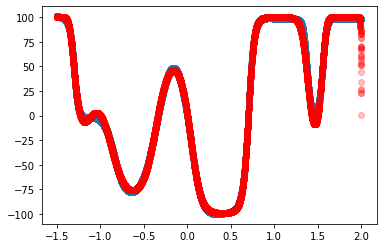

In [50]:
plt.scatter(X, n_ml.forward(X), alpha = 0.5)
plt.scatter(X, Y, color='red', alpha = 0.25)
plt.show()

Wizualizacja predykcji na zbiorze testowym

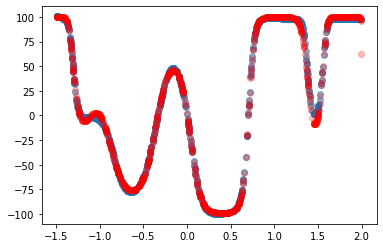

In [51]:
plt.scatter(X1, n_ml.forward(X1), alpha = 0.5)
plt.scatter(X1, Y1, color='red', alpha = 0.25)
plt.show()